In [1]:
# implement a logistic regression model on the dataset provided to predict whether it will rain tomorrow or not.

In [2]:
# importing libraries: 
# numpy- used for working with arrays and matrices
# pandas- used for data manipulation and analysis
# matplotlib- used for dat visualizaation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
#loading given data from CSV file
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# counting the number of values in each column to analyse the number of missing values.
df.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

In [5]:
# the features sunshine, Evaporation, Cloud3pm & Cloud9am  have a large number of missing values.
# these features are going to be less useful due to large amounts of missing data, hence removing these columns.
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am'],axis=1)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [6]:
# checking for any missing values in the data set to get rid of unnecessary training examples
# df['your column name'].isnull().values.any() : this command checks for any nan values in the data frame.
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

              Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
14      2008-12-15   Albury      8.4     24.6       0.0         NaN   
15      2008-12-16   Albury      9.8     27.7       NaN         WNW   
26      2008-12-27   Albury     16.9     33.0       0.0         WSW   
64      2009-02-03   Albury     21.5     37.7       0.0         NaN   
65      2009-02-04   Albury     21.7     36.9       0.0         NaN   
...            ...      ...      ...      ...       ...         ...   
145335  2017-02-21    Uluru     13.5      NaN       0.0         NaN   
145336  2017-02-22    Uluru     16.1     38.0       NaN         SSW   
145422  2017-05-19    Uluru      4.3     22.4       0.0         ENE   
145429  2017-05-26    Uluru     14.3     27.6       0.4         WNW   
145459  2017-06-25    Uluru     14.9      NaN       0.0         NaN   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
14                NaN          S        WNW           4.0          30.0 

In [7]:
# since we still have columns with multiple NA  values, let's get rid of training examples that have missing values.
df = df.dropna()
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


In [8]:
# retrieving the numerical values from the dataset
numerics = ['float']
Z = df.select_dtypes(include=numerics)
Z

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1


In [9]:
def feature_normalize(Z):
    """
     Normalizes the features / input variables in Z.
     
     Parameters
     ----------
     Z : n dimensional array (matrix)
        numerical type Features (input variables) to be normalized.
         
     Returns
     -------
     Z_norm : n dimensional array (matrix)
              a normalized version of Z.
     mu : n dimensional array(matrix),
          the mean value.
     sigma : n dimensional array (matrix)
             the standard deviation/range.
    """
    # since we need the mean of individual column here, hence axis = 0
    mu = np.mean(Z, axis = 0)
    # the parameter ddof (Delta Degrees of Freedom) values is 1.
    sigma = np.std(Z, axis = 0)
    Z_norm = (Z - mu)/sigma
    return Z_norm 

In [10]:
# normalizing data
Z = feature_normalize(Z)

print('Z_norm=\n',Z[:5])

Z_norm=
     MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0  0.117567 -0.108221 -0.206661       0.241214      0.577742      0.524408   
1 -0.841802  0.206845 -0.276405       0.241214     -1.339742      0.291310   
2  0.037620  0.292772 -0.276405       0.391345      0.457900      0.757507   
3 -0.553991  0.622159 -0.276405      -1.260094     -0.500842     -1.223831   
4  0.773137  1.237969 -0.160165       0.016018     -0.980214      0.058211   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  
0     0.190140    -1.380413    -1.382962    -1.142455 -0.088435 -0.047870  
1    -1.237561    -1.235963    -0.970598    -1.041848 -0.041228  0.317768  
2    -1.554828    -0.995214    -1.397181    -0.912497  0.556724  0.156887  
3    -1.184683    -1.669313     0.024764    -0.323229  0.100392  0.639531  
4     0.771796    -0.850764    -0.942159    -1.300551  0.053185  1.107548  


In [11]:
# even after normalizing data we might find deviations of large index. 
# deviations larger than an index of 3 are termed outliers and can heavily damage the accuracy of our logistic regression model.
# hence it is best to remove such large deviations from out dataset
Z = np.abs(Z)
#print(Z)
df = df[(Z < 3).all(axis=1)]
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


In [12]:
for col in Z:
    df[col] = feature_normalize(df[col])
df

C:\Users\kedar\AppData\Local\Temp/ipykernel_3480/4081920828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = feature_normalize(df[col])


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,0.133606,-0.108909,-0.226104,W,0.353152,W,WNW,0.692529,0.615619,0.195478,-1.389100,-1.493284,-1.232228,-0.078998,-0.050806,No,No
1,2008-12-02,Albury,-0.826105,0.209120,-0.379755,WNW,0.353152,NNW,WSW,-1.395172,0.366169,-1.263051,-1.242074,-1.062586,-1.127614,-0.031559,0.318654,No,No
2,2008-12-03,Albury,0.053630,0.295856,-0.379755,WSW,0.520274,W,WSW,0.562048,0.865070,-1.587168,-0.997030,-1.508136,-0.993110,0.569330,0.156092,No,No
3,2008-12-04,Albury,-0.538192,0.628341,-0.379755,NE,-1.318072,SE,E,-0.481803,-1.255260,-1.209031,-1.683153,-0.022970,-0.380371,0.110757,0.643778,No,No
4,2008-12-05,Albury,0.789409,1.249943,-0.123670,W,0.102468,ENE,NW,-1.003728,0.116718,0.789694,-0.850004,-1.032883,-1.396622,0.063318,1.116686,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,-1.449917,-0.267923,-0.379755,E,-0.733144,ESE,E,0.040123,-0.756359,-0.452757,-1.144057,1.031498,0.874999,-1.264962,-0.183811,No,No
145455,2017-06-21,Uluru,-1.561884,-0.036629,-0.379755,E,-0.733144,SE,ENE,-0.220840,-1.005810,-0.884914,-1.291083,1.016646,0.740495,-1.154272,0.037865,No,No
145456,2017-06-22,Uluru,-1.433922,0.238032,-0.379755,NNW,-1.485194,SE,N,-0.220840,-1.255260,-0.614816,-1.438109,0.853278,0.561157,-1.027769,0.348211,No,No
145457,2017-06-23,Uluru,-1.146009,0.469326,-0.379755,N,-0.231776,SE,WNW,-0.742765,-1.255260,-0.776874,-1.291083,0.481987,0.217424,-0.774763,0.584665,No,No


In [13]:
# converting yes and no to numerical data so it is readable by the logistic model

df.iloc[:,17].replace({'No': 0, 'Yes': 1},inplace = True)
df.iloc[:,18].replace({'No': 0, 'Yes': 1},inplace = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,0.133606,-0.108909,-0.226104,W,0.353152,W,WNW,0.692529,0.615619,0.195478,-1.389100,-1.493284,-1.232228,-0.078998,-0.050806,0,0
1,2008-12-02,Albury,-0.826105,0.209120,-0.379755,WNW,0.353152,NNW,WSW,-1.395172,0.366169,-1.263051,-1.242074,-1.062586,-1.127614,-0.031559,0.318654,0,0
2,2008-12-03,Albury,0.053630,0.295856,-0.379755,WSW,0.520274,W,WSW,0.562048,0.865070,-1.587168,-0.997030,-1.508136,-0.993110,0.569330,0.156092,0,0
3,2008-12-04,Albury,-0.538192,0.628341,-0.379755,NE,-1.318072,SE,E,-0.481803,-1.255260,-1.209031,-1.683153,-0.022970,-0.380371,0.110757,0.643778,0,0
4,2008-12-05,Albury,0.789409,1.249943,-0.123670,W,0.102468,ENE,NW,-1.003728,0.116718,0.789694,-0.850004,-1.032883,-1.396622,0.063318,1.116686,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,-1.449917,-0.267923,-0.379755,E,-0.733144,ESE,E,0.040123,-0.756359,-0.452757,-1.144057,1.031498,0.874999,-1.264962,-0.183811,0,0
145455,2017-06-21,Uluru,-1.561884,-0.036629,-0.379755,E,-0.733144,SE,ENE,-0.220840,-1.005810,-0.884914,-1.291083,1.016646,0.740495,-1.154272,0.037865,0,0
145456,2017-06-22,Uluru,-1.433922,0.238032,-0.379755,NNW,-1.485194,SE,N,-0.220840,-1.255260,-0.614816,-1.438109,0.853278,0.561157,-1.027769,0.348211,0,0
145457,2017-06-23,Uluru,-1.146009,0.469326,-0.379755,N,-0.231776,SE,WNW,-0.742765,-1.255260,-0.776874,-1.291083,0.481987,0.217424,-0.774763,0.584665,0,0


In [14]:
# extracting month values form date, because rain depends on the month of the year
date = df.Date
date = date.values
size = date.shape
month = np.zeros(size[0])
for i in range (size[0]):
    date[i]=date[i].split(sep='-')
    month[i] = int(date[i][1])
month

array([12., 12., 12., ...,  6.,  6.,  6.])

In [15]:
df.iloc[:,0]=month
df

C:\Users\kedar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12.0,Albury,0.133606,-0.108909,-0.226104,W,0.353152,W,WNW,0.692529,0.615619,0.195478,-1.389100,-1.493284,-1.232228,-0.078998,-0.050806,0,0
1,12.0,Albury,-0.826105,0.209120,-0.379755,WNW,0.353152,NNW,WSW,-1.395172,0.366169,-1.263051,-1.242074,-1.062586,-1.127614,-0.031559,0.318654,0,0
2,12.0,Albury,0.053630,0.295856,-0.379755,WSW,0.520274,W,WSW,0.562048,0.865070,-1.587168,-0.997030,-1.508136,-0.993110,0.569330,0.156092,0,0
3,12.0,Albury,-0.538192,0.628341,-0.379755,NE,-1.318072,SE,E,-0.481803,-1.255260,-1.209031,-1.683153,-0.022970,-0.380371,0.110757,0.643778,0,0
4,12.0,Albury,0.789409,1.249943,-0.123670,W,0.102468,ENE,NW,-1.003728,0.116718,0.789694,-0.850004,-1.032883,-1.396622,0.063318,1.116686,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,6.0,Uluru,-1.449917,-0.267923,-0.379755,E,-0.733144,ESE,E,0.040123,-0.756359,-0.452757,-1.144057,1.031498,0.874999,-1.264962,-0.183811,0,0
145455,6.0,Uluru,-1.561884,-0.036629,-0.379755,E,-0.733144,SE,ENE,-0.220840,-1.005810,-0.884914,-1.291083,1.016646,0.740495,-1.154272,0.037865,0,0
145456,6.0,Uluru,-1.433922,0.238032,-0.379755,NNW,-1.485194,SE,N,-0.220840,-1.255260,-0.614816,-1.438109,0.853278,0.561157,-1.027769,0.348211,0,0
145457,6.0,Uluru,-1.146009,0.469326,-0.379755,N,-0.231776,SE,WNW,-0.742765,-1.255260,-0.776874,-1.291083,0.481987,0.217424,-0.774763,0.584665,0,0


In [16]:
df = df.rename(columns = {'Date':'month'})
df

,month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12.0,Albury,0.133606,-0.108909,-0.226104,W,0.353152,W,WNW,0.692529,0.615619,0.195478,-1.389100,-1.493284,-1.232228,-0.078998,-0.050806,0,0
1,12.0,Albury,-0.826105,0.209120,-0.379755,WNW,0.353152,NNW,WSW,-1.395172,0.366169,-1.263051,-1.242074,-1.062586,-1.127614,-0.031559,0.318654,0,0
2,12.0,Albury,0.053630,0.295856,-0.379755,WSW,0.520274,W,WSW,0.562048,0.865070,-1.587168,-0.997030,-1.508136,-0.993110,0.569330,0.156092,0,0
3,12.0,Albury,-0.538192,0.628341,-0.379755,NE,-1.318072,SE,E,-0.481803,-1.255260,-1.209031,-1.683153,-0.022970,-0.380371,0.110757,0.643778,0,0
4,12.0,Albury,0.789409,1.249943,-0.123670,W,0.102468,ENE,NW,-1.003728,0.116718,0.789694,-0.850004,-1.032883,-1.396622,0.063318,1.116686,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,6.0,Uluru,-1.449917,-0.267923,-0.379755,E,-0.733144,ESE,E,0.040123,-0.756359,-0.452757,-1.144057,1.031498,0.874999,-1.264962,-0.183811,0,0
145455,6.0,Uluru,-1.561884,-0.036629,-0.379755,E,-0.733144,SE,ENE,-0.220840,-1.005810,-0.884914,-1.291083,1.016646,0.740495,-1.154272,0.037865,0,0
145456,6.0,Uluru,-1.433922,0.238032,-0.379755,NNW,-1.485194,SE,N,-0.220840,-1.255260,-0.614816,-1.438109,0.853278,0.561157,-1.027769,0.348211,0,0
145457,6.0,Uluru,-1.146009,0.469326,-0.379755,N,-0.231776,SE,WNW,-0.742765,-1.255260,-0.776874,-1.291083,0.481987,0.217424,-0.774763,0.584665,0,0


In [17]:
# one hot encoding our categorical data
categorical_columns = ['Location','WindGustDir','WindDir9am','WindDir3pm']

for col in categorical_columns:
    print(np.unique(df[col]))

df = pd.get_dummies(df,columns=categorical_columns)
print(df.columns)

['Adelaide' 'Albury' 'AliceSprings' 'BadgerysCreek' 'Ballarat' 'Bendigo'
 'Brisbane' 'Cairns' 'Canberra' 'Cobar' 'CoffsHarbour' 'Dartmoor' 'Darwin'
 'GoldCoast' 'Hobart' 'Katherine' 'Launceston' 'Melbourne'
 'MelbourneAirport' 'Mildura' 'Moree' 'MountGambier' 'Nhil' 'NorahHead'
 'NorfolkIsland' 'Nuriootpa' 'PearceRAAF' 'Perth' 'PerthAirport'
 'Portland' 'Richmond' 'Sale' 'Sydney' 'SydneyAirport' 'Townsville'
 'Tuggeranong' 'Uluru' 'WaggaWagga' 'Walpole' 'Watsonia' 'Williamtown'
 'Witchcliffe' 'Wollongong' 'Woomera']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
Index(['month', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am',
       ...
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindD

In [18]:
# set X to all features
m = len(df)
a = int(0.8*m)
df_train = df.loc[:a,:]
df_test = df.loc[(a+1):,:]
X = df_train.loc[:,df.columns!='RainTomorrow']
# set y to our target RainTomorrow
y = df_train.RainTomorrow

#converting dataframes into arrays
X = X.to_numpy()
y = y.to_numpy()
y = np.abs(y)
#print(y)
# m = number of training examples; n= number of features
(m,n)=X.shape
print('m= ',m,',n= ',n,'a= ',a)

m=  63331 ,n=  106 a=  86294


In [19]:
def sigmoid(x):
    """
    compute the sigmoid function of product of training examples and computed theta
    
    Input parameters
    ----------------
    x:  dot product of training examples and theta. Dimension(m x 1)
         m = number of training examples
         n = number of features (includes column of ones)
         
     Output Parameters
     -----------------
     z: 1D array of sigmoid values. dimesnions(1 x m)
     """
    z = 1/(1 + np.exp(-x))
    
    return z

In [20]:
def compute_cost(X, y, theta):
    """
     Compute the cost of a particular choice of theta for linear regression.
     
     Input parameters
     ----------------
     X : 2D array where each row represent the training example and each column represents the feature ndarray. Dimension(m x n)
         m = number of training examples
         n = number of features (includes column of ones)
     y : 1D array of labels/target value for each training example. Dimensions(1 x m)
     
     theta: 1D array of fitting parameters. Dimensions(1 x n)
     
     Output Parameters
     -----------------
     J : scalar value.
     """
    predictions = sigmoid(X.dot(np.transpose(theta)))
    #print ('prediction= ',predictions) 
    # cost function for logistic regression
    J = (-1)*(1/m)*np.sum((np.transpose(y)*np.log(predictions),np.transpose(1-y)*np.log(1-predictions)))
   
    
    return J

In [21]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute cost for linear regression.
    
    Input parameters
    ----------------
    X : 2D array where each row represents the training example and each column represents the features ndarray. 
        Dimension(m x n)
        m = number of training of training examples
        n = number of features (including column of 1s)
    y : 1D array of labels/target value for each training example. dimension(m x 1)
    theta : 1D array of fitting parameters. Dimension (1 x n)
    alpha : Learning rate, scalar value
    iterations : No of iterations. Scalar value.
    
    Output Parameters
    -----------------
    theta : final value. 1D array of fitting parameters. Dimensions (1 x n)
    cost_history : contains value of cost for each iteration. 1D array. Dimensions(m x 1)
    """
    # initialising cost_history 
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        # print('theta= ',theta)
        predictions = sigmoid(X.dot(np.transpose(theta)))
        #print('predictions= ',predictions)
        errors = np.subtract(predictions,y)
        # print('errors =',errors)
        sum_delta = (alpha/m)*X.transpose().dot(errors)
        # print('sum_delta =',sum_delta)
        theta = np.subtract(theta,sum_delta)
        
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history

In [22]:
# we need theta parameter for every input variable. hence initializing the array
theta = np.zeros(n)
iterations = 400;
alpha = 0.01;
print(theta)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =\n ', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5:])

Final value of theta =
  [-1.89870508e-01  5.10557034e-02 -1.27897956e-01  1.76015207e-01
  1.93244883e-01  4.40669271e-02  7.06781063e-03  1.16694393e-01
  4.06094622e-01 -1.47612475e-01 -1.76241939e-01  1.05738152e-02
 -1.65971935e-01  3.36051959e-02  0.00000000e+00 -6.18824419e-03
  0.00000000e+00 -9.63619740e-03 -1.45262986e-02 -1.32171393e-02
 -1.29066433e-03  0.00000000e+00 -1.53949898e-02 -1.55761829e-02
 -3.32984581e-03  2.32317654e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.88756325e-03
 -1.55093600e-02 -2.00900920e-02 -1.63235574e-02  0.00000000e+00
 -1.05518346e-02 -1.02491927e-02 -6.34113072e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.06412648e-03
 -6.75991668e-03 -1.65438584e-02 -4.58937641e-03 -9.02251279e-03
  0.00000000e+00 -1.11696849e-02  0.00000000e+00 -1.18441954e-02
  0.00000000e+00 -6.78293377e-03 -7.15062804e-03  0.00000000e+00
 -1.62141746e-02  0.00000000e+00 -2.35346221e-02 -1.78078828e-02


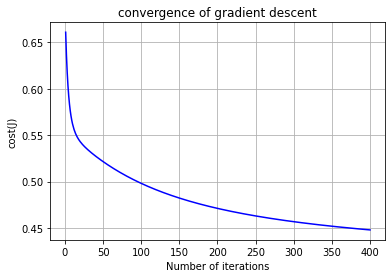

In [24]:
# visualization
plt.plot(range(1,iterations +1), cost_history,color='blue')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost(J)")
plt.title("convergence of gradient descent")
plt.rcParams["figure.figsize"] = (30,20)
plt.show()

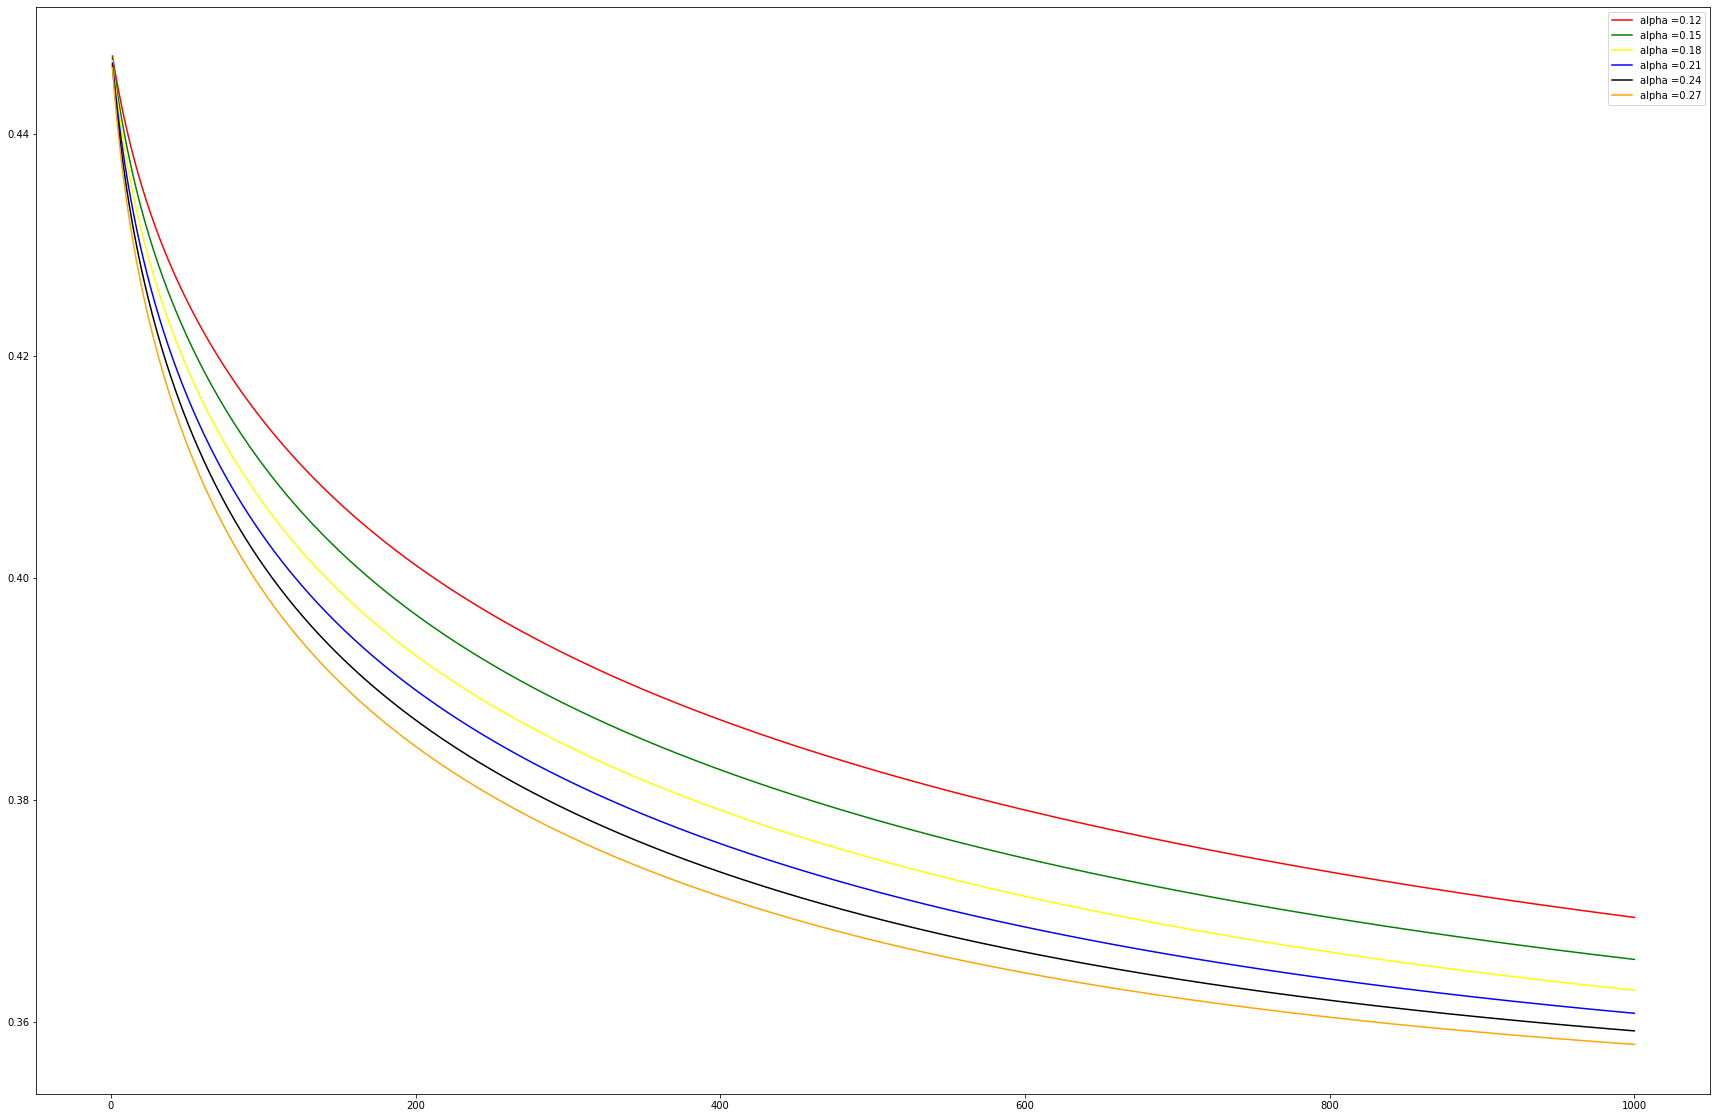

In [25]:
iterations = 1000

alpha = 0.12;
theta_2,cost_history_2 = gradient_descent(X, y, theta, alpha, iterations)


alpha = 0.15;
theta_3,cost_history_3 = gradient_descent(X, y, theta, alpha, iterations)


alpha = 0.18;
theta_4,cost_history_4 = gradient_descent(X, y, theta, alpha, iterations)


alpha = 0.21;
theta_5,cost_history_5 = gradient_descent(X, y,theta, alpha, iterations)


alpha = 0.24;
theta_6,cost_history_6 = gradient_descent(X, y, theta, alpha, iterations)


alpha = 0.27;
theta_7,cost_history_7 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1),cost_history_2, color= 'red', label = 'alpha =0.12')
plt.plot(range(1, iterations +1),cost_history_3, color= 'green', label = 'alpha =0.15')
plt.plot(range(1, iterations +1),cost_history_4, color= 'yellow', label = 'alpha =0.18')
plt.plot(range(1, iterations +1),cost_history_5, color= 'blue', label = 'alpha =0.21')
plt.plot(range(1, iterations +1),cost_history_6, color= 'black', label = 'alpha =0.24')
plt.plot(range(1, iterations +1),cost_history_7, color= 'orange', label = 'alpha =0.27')
plt.legend()
plt.rcParams["figure.figsize"] = (30,20)

In [26]:
# from the above graphs we notis alpha = 0.27 has the lowest nymber of iterations and the least value of cost function
theta = np.zeros(n)
iterations = 1000;
alpha = 0.27;
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =\n ', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5:])

Final value of theta =
  [-0.04772855 -0.0091373  -0.02319205  0.16703156  0.7323684  -0.07446683
 -0.32236097 -0.05157774  1.41181442  0.63937645 -0.98490635  0.13983161
 -0.141226    0.07554362  0.          0.02130561  0.         -0.1940775
 -0.4961335  -0.18185954 -0.00687858  0.         -0.2789825  -0.02794147
 -0.24128612 -0.21820031  0.          0.          0.          0.
  0.         -0.16160124 -0.31495766 -0.11293983 -0.16760103  0.
 -0.21674203 -0.73676296 -0.55386994  0.          0.          0.
  0.         -0.1773835  -0.13115692 -0.38852401 -0.09604783 -0.17486522
  0.         -0.2263286   0.         -0.05026363  0.         -0.26780185
 -0.10158748  0.         -0.9542953   0.         -0.47194071 -0.41033698
 -0.23255182 -0.37465171 -0.67114046 -0.512081   -0.22622224 -0.38224561
 -0.39067462 -0.37046079 -0.36938051 -0.43947175 -0.32818156 -0.47109076
 -0.42890594 -0.37744649 -0.2792384  -0.1604007  -0.34714604 -0.4348466
 -0.21295448 -0.25760431 -0.41424843 -0.51332932 -0.

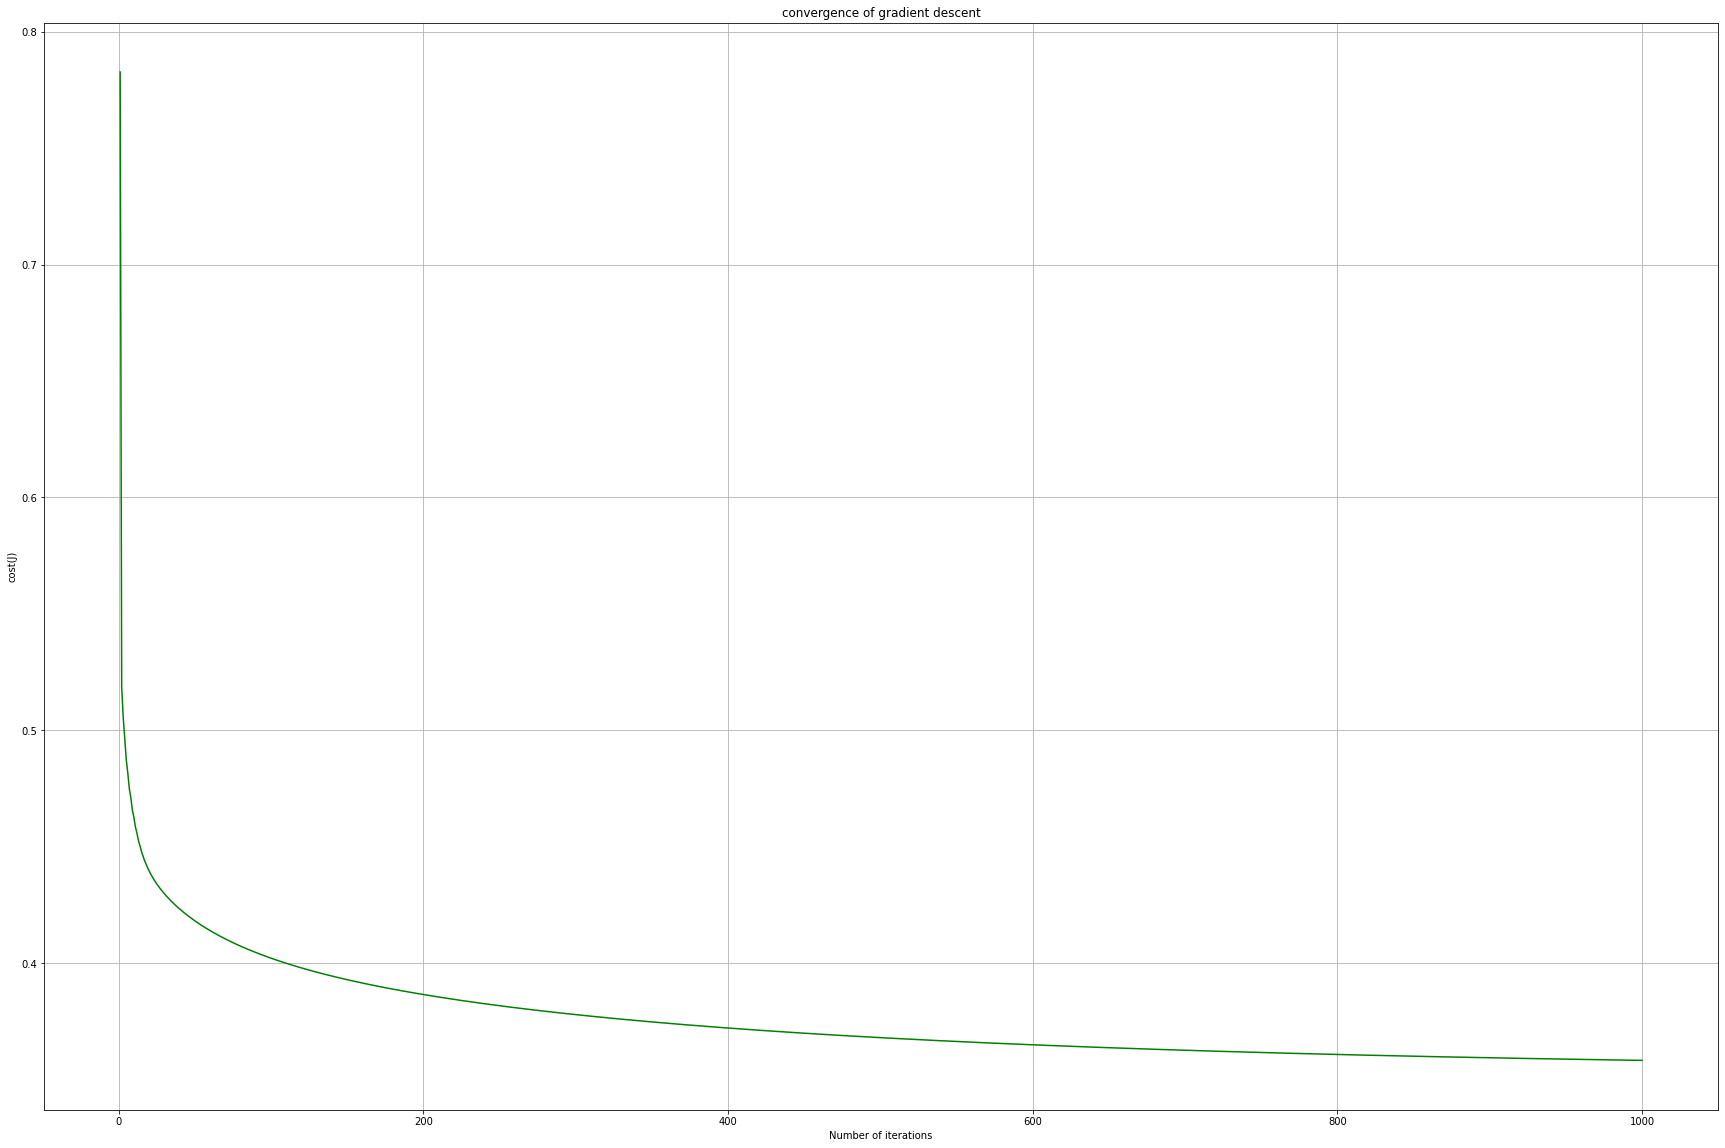

In [27]:
# visualization
plt.plot(range(1,iterations +1), cost_history,color='green')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost(J)")
plt.title("convergence of gradient descent")
plt.rcParams["figure.figsize"] = (30,20)
plt.show()

In [28]:
X_test = df_test.loc[:,df_test.columns!='RainTomorrow']
# set y to our target RainTomorrow
y_test = df_test.RainTomorrow

#converting dataframes into arrays
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
#print(y)
# m = number of training examples; n= number of features
(m,n)=X_test.shape
print('m= ',m,',n= ',n)

m=  44537 ,n=  106


In [29]:
hx = sigmoid(X_test.dot(np.transpose(theta)))

for i in range(m):
    if hx[i]>=0.5:
        hx[i]=1
    else:
        hx[i]=0
hx

array([0., 0., 1., ..., 0., 0., 0.])

In [30]:
correct = 0
for i in range(m):
    if hx[i]==y_test[i]:
        correct=correct+1
    else:
        correct=correct
accuracy = (correct/m)*100
print('accuracy of logistic regression model= ',accuracy,'%')


accuracy of logistic regression model=  85.85894873925051 %
